In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot  as plt
import  pandas as pd
%matplotlib inline

In [2]:
import os
import cv2

cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))
haar_model = os.path.join(cv2_base_dir, 'data/haarcascade_frontalface_default.xml')
haar_model1 = os.path.join(cv2_base_dir, 'data/haarcascade_eye.xml')

In [3]:
img = cv2.imread('./dataset/Aras_Bulut_Iynemli/Aras Bulut İynemli - Beyazperde.com.jpg')
img.shape

(800, 600, 3)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(800, 600)

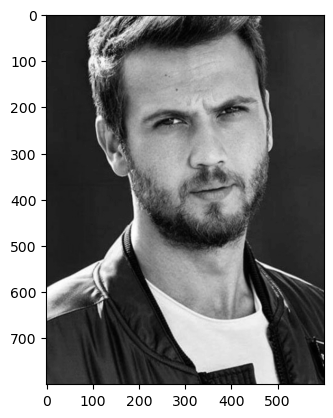

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier(haar_model)
eye_cascade = cv2.CascadeClassifier(haar_model1)
print(face_cascade)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

< cv2.CascadeClassifier 000001D488AAE3D0>


array([[158,  85, 377, 377]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(158, 85, 377, 377)

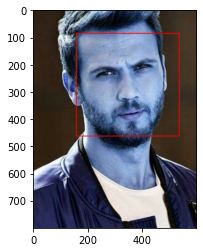

In [29]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

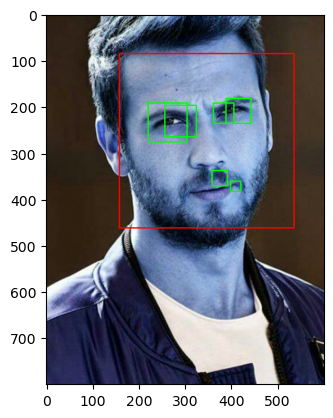

In [8]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

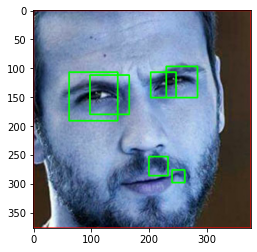

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [9]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]

        roi_color = img[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) >= 2:

            return roi_color

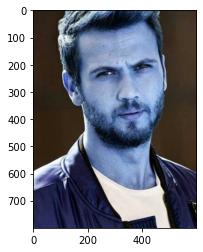

In [14]:
original_image = cv2.imread('./dataset/Aras_Bulut_Iynemli/Aras Bulut İynemli - Beyazperde.com.jpg')
plt.imshow(original_image)

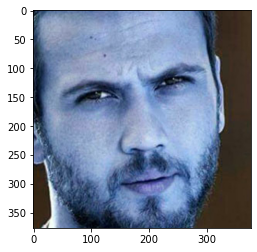

In [16]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/Aras_Bulut_Iynemli/Aras Bulut İynemli - Beyazperde.com.jpg')
plt.imshow(cropped_image)


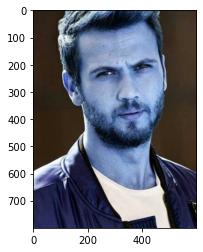

In [30]:
org_image_obstructed = cv2.imread('./dataset/Aras_Bulut_Iynemli/Aras Bulut İynemli - Beyazperde.com.jpg')
plt.imshow(org_image_obstructed)

In [31]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./dataset/Aras_Bulut_Iynemli/Aras Bulut İynemli - Beyazperde.com.jpg')
cropped_image_no_2_eyes

array([[[18, 27, 40],
        [15, 26, 40],
        [18, 28, 45],
        ...,
        [69, 53, 36],
        [69, 53, 36],
        [69, 53, 36]],

       [[11, 20, 33],
        [11, 22, 36],
        [ 8, 20, 38],
        ...,
        [68, 52, 35],
        [69, 53, 36],
        [69, 53, 36]],

       [[11, 20, 33],
        [14, 26, 38],
        [14, 28, 46],
        ...,
        [68, 52, 35],
        [68, 52, 35],
        [69, 53, 36]],

       ...,

       [[64, 41, 25],
        [63, 43, 26],
        [58, 44, 26],
        ...,
        [60, 44, 27],
        [60, 44, 27],
        [60, 44, 27]],

       [[65, 42, 26],
        [61, 43, 26],
        [58, 44, 26],
        ...,
        [60, 44, 27],
        [60, 44, 27],
        [60, 44, 27]],

       [[63, 42, 27],
        [59, 43, 27],
        [59, 45, 27],
        ...,
        [60, 44, 27],
        [60, 44, 27],
        [60, 44, 27]]], dtype=uint8)

In [47]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [48]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [49]:
img_dirs

['./dataset/Aras_Bulut_Iynemli',
 './dataset/Binnur_Kaya',
 './dataset/cropped',
 './dataset/Cuneyt_Arkin',
 './dataset/Ferdi_TAYful',
 './dataset/Gulsen_Bubikoglu',
 './dataset/Kenan_Imirzalioglu']

In [50]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [51]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            print(entry)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/Aras_Bulut_Iynemli
<DirEntry '120 Aras Bulut iynemli❤️_ ideas.jpg'>
<DirEntry 'Aras Bulut Iynemli (2).jpg'>
<DirEntry 'Aras Bulut Iynemli - IMDb.jpg'>
<DirEntry 'Aras Bulut Iynemli _ Turkish actors.jpg'>
<DirEntry 'Aras Bulut Iynemli.jpg'>
<DirEntry 'Aras Bulut İynemli - Beyazperde.com.jpg'>
<DirEntry 'Aras Bulut İynemli - Box Office Türkiye.jpg'>
<DirEntry 'Aras Bulut İynemli - Changes — The.jpg'>
<DirEntry 'Aras Bulut İynemli 30 yaşında - Magazin.jpg'>
<DirEntry 'Aras Bulut İynemli bayramları.jpeg'>
<DirEntry 'Aras Bulut İynemli Haberleri - Son.jpg'>
<DirEntry 'Aras Bulut İynemli Hakkında Bilinmeyen (2).jpg'>
<DirEntry 'Aras Bulut İynemli Hakkında Bilinmeyen.jpg'>
<DirEntry 'Aras Bulut İynemli Hepimizi Set.jpg'>
<DirEntry 'Aras Bulut İynemli Kimdir - Son Dakika.jpg'>
<DirEntry 'Aras Bulut İynemli kimdir.jpg'>
<DirEntry 'Aras Bulut İynemli Kimdir_ - Güncel.jpg'>
<DirEntry 'Aras Bulut İynemli Kimdir_ - Yamaç (1).jpg'>
<DirEntry 'A

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [52]:
celebrity_file_names_dict

{'Aras_Bulut_Iynemli': ['./dataset/cropped/Aras_Bulut_Iynemli/Aras_Bulut_Iynemli1.png',
  './dataset/cropped/Aras_Bulut_Iynemli/Aras_Bulut_Iynemli2.png',
  './dataset/cropped/Aras_Bulut_Iynemli/Aras_Bulut_Iynemli3.png',
  './dataset/cropped/Aras_Bulut_Iynemli/Aras_Bulut_Iynemli4.png',
  './dataset/cropped/Aras_Bulut_Iynemli/Aras_Bulut_Iynemli5.png',
  './dataset/cropped/Aras_Bulut_Iynemli/Aras_Bulut_Iynemli6.png',
  './dataset/cropped/Aras_Bulut_Iynemli/Aras_Bulut_Iynemli7.png',
  './dataset/cropped/Aras_Bulut_Iynemli/Aras_Bulut_Iynemli8.png',
  './dataset/cropped/Aras_Bulut_Iynemli/Aras_Bulut_Iynemli9.png',
  './dataset/cropped/Aras_Bulut_Iynemli/Aras_Bulut_Iynemli10.png',
  './dataset/cropped/Aras_Bulut_Iynemli/Aras_Bulut_Iynemli11.png',
  './dataset/cropped/Aras_Bulut_Iynemli/Aras_Bulut_Iynemli12.png',
  './dataset/cropped/Aras_Bulut_Iynemli/Aras_Bulut_Iynemli13.png',
  './dataset/cropped/Aras_Bulut_Iynemli/Aras_Bulut_Iynemli14.png',
  './dataset/cropped/Aras_Bulut_Iynemli/Aras_Bulu

In [53]:
cropped_image_dirs

['./dataset/cropped/Aras_Bulut_Iynemli', './dataset/cropped/Binnur_Kaya']

In [43]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


In [41]:
# im_har = w2d(cropped_img,'db1',5)
# plt.imshow(im_har, cmap='gray')

'C:\\Users\\Windows10\\anaconda3\\envs\\2intern\\lib\\site-packages\\cv2\\data/haarcascade_frontalface_default.xml'

In [44]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Aras_Bulut_Iynemli': ['./dataset/cropped/Aras_Bulut_Iynemli\\Aras_Bulut_Iynemli1.png',
  './dataset/cropped/Aras_Bulut_Iynemli\\Aras_Bulut_Iynemli10.png',
  './dataset/cropped/Aras_Bulut_Iynemli\\Aras_Bulut_Iynemli11.png',
  './dataset/cropped/Aras_Bulut_Iynemli\\Aras_Bulut_Iynemli12.png',
  './dataset/cropped/Aras_Bulut_Iynemli\\Aras_Bulut_Iynemli13.png',
  './dataset/cropped/Aras_Bulut_Iynemli\\Aras_Bulut_Iynemli14.png',
  './dataset/cropped/Aras_Bulut_Iynemli\\Aras_Bulut_Iynemli15.png',
  './dataset/cropped/Aras_Bulut_Iynemli\\Aras_Bulut_Iynemli16.png',
  './dataset/cropped/Aras_Bulut_Iynemli\\Aras_Bulut_Iynemli17.png',
  './dataset/cropped/Aras_Bulut_Iynemli\\Aras_Bulut_Iynemli18.png',
  './dataset/cropped/Aras_Bulut_Iynemli\\Aras_Bulut_Iynemli19.png',
  './dataset/cropped/Aras_Bulut_Iynemli\\Aras_Bulut_Iynemli2.png',
  './dataset/cropped/Aras_Bulut_Iynemli\\Aras_Bulut_Iynemli20.png',
  './dataset/cropped/Aras_Bulut_Iynemli\\Aras_Bulut_Iynemli21.png',
  './dataset/cropped/Aras_Bu

In [45]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Aras_Bulut_Iynemli': 0,
 'Binnur_Kaya': 1,
 'Cuneyt_Arkin': 2,
 'Ferdi_TAYful': 3,
 'Gulsen_Bubikoglu': 4,
 'Kenan_Imirzalioglu': 5}

In [46]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)

        scalled_raw_img = cv2.resize(img, (32, 32))

        img_har = w2d(img,'db1',5)

        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [47]:
len(X[0])

4096

In [48]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(354, 4096)

In [49]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10 ,verbose=True))])
history=pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

[LibSVM]

0.7191011235955056

In [51]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.71      0.74      0.72        23
           2       0.64      0.75      0.69        12
           3       0.92      0.86      0.89        14
           4       0.53      0.53      0.53        15
           5       0.92      0.79      0.85        14

    accuracy                           0.72        89
   macro avg       0.73      0.72      0.72        89
weighted avg       0.73      0.72      0.72        89



In [52]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [53]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [54]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.758491,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.573585,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.728302,{'logisticregression__C': 1}


In [207]:
def make_meshgrid(x, y, h=.02):

    x_min, x_max = x.min() - 1, x.max() + 1

    y_min, y_max = y.min() - 1, y.max() + 1
    z=np.arange(x_min, x_max, h)

    z1=np.arange(y_min, y_max, h)

    xx, yy = np.meshgrid(z, z1, sparse=True)


    return xx, yy

In [5]:

df1=pd.read_csv('model.csv')

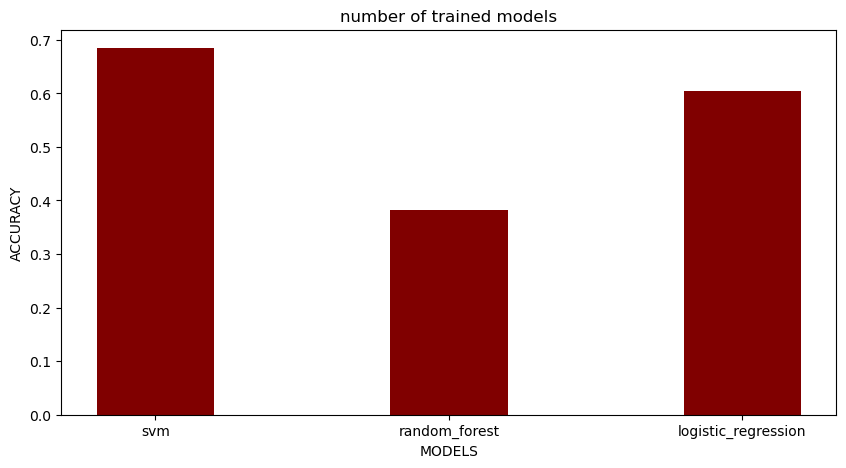

In [6]:
courses = df1.model
values = df1.best_score

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)

plt.xlabel("MODELS")
plt.ylabel("ACCURACY")
plt.title("number of trained models")
plt.show()

In [55]:
best_estimators['svm'].score(X_test,y_test)

0.7528089887640449

In [56]:
best_estimators['random_forest'].score(X_test,y_test)

0.5617977528089888

In [57]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7415730337078652

In [58]:
best_clf = best_estimators['svm']

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  1,  1,  0,  0,  0],
       [ 0, 20,  1,  0,  2,  0],
       [ 1,  2,  7,  1,  0,  1],
       [ 0,  2,  1, 10,  0,  1],
       [ 1,  3,  1,  0, 10,  0],
       [ 3,  0,  0,  0,  0, 11]], dtype=int64)

Text(69.0, 0.5, 'Truth')

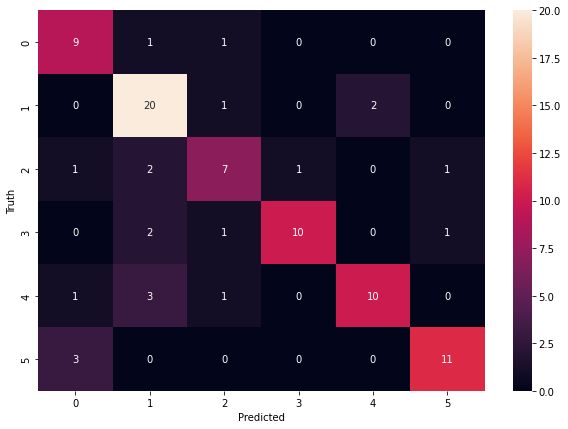

In [60]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


usman

khalid



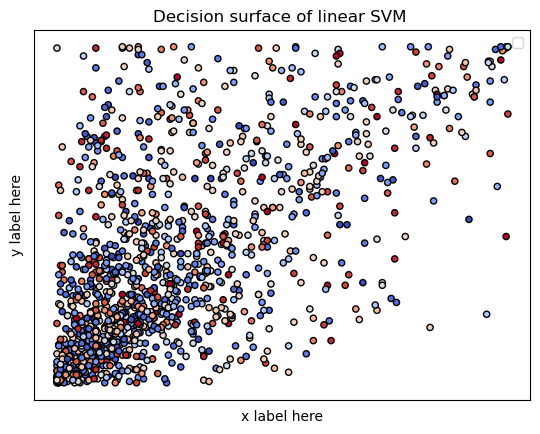

In [224]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVM ')
# Set-up grid for plotting.

X0, X1 = X_train[:,6], X_train[:,2 ]

xx, yy = make_meshgrid(X0, X1)
print('usman\n')

print('khalid\n')



ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [185]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [186]:
class_dict

{'Aras Bulut İynemli': 0,
 'Binnur Kaya': 1,
 'Courtois': 2,
 'Cristiano Ronaldo': 3,
 'Cüneyt Arkın': 4,
 'Dybala': 5,
 'EFENDIM ERDOGAN': 6,
 'EFENDIM MUSTAFA KEMAL ATATURK': 7,
 'Ferdi TAYful': 8,
 'Gülşen Bubikoğlu': 9,
 'Haluk Bilginer': 10,
 'haluk levent': 11,
 'Halıl ergenc': 12,
 'hazar kaya': 13,
 'Kenan İmirzalıoğlu': 14,
 'Kross': 15,
 'Lionel Messi': 16,
 'Mohamed Salah': 17,
 'Muslum Baba': 18,
 'Neymar': 19,
 'Pogba': 20,
 'Sezen Aksu': 21,
 'Tarken': 22,
 'Türkan Şoray': 23,
 'İlber Ortaylı': 24,
 'Şahan Gökbakar': 25,
 'Şener Şen': 26}

In [188]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [241]:
X_train.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [236]:
X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

In [279]:
list1=[]
list2=[]
i=9
for ii in range(4094):
    i=i+1
    list1.append(1.5)
    list2.append(i)


In [7]:
res = {}
for key in list2:
    for value in list1:
        res[key] = value
        list1.remove(value)
        break

NameError: name 'list2' is not defined

In [281]:
res

{10: 1.5,
 11: 1.5,
 12: 1.5,
 13: 1.5,
 14: 1.5,
 15: 1.5,
 16: 1.5,
 17: 1.5,
 18: 1.5,
 19: 1.5,
 20: 1.5,
 21: 1.5,
 22: 1.5,
 23: 1.5,
 24: 1.5,
 25: 1.5,
 26: 1.5,
 27: 1.5,
 28: 1.5,
 29: 1.5,
 30: 1.5,
 31: 1.5,
 32: 1.5,
 33: 1.5,
 34: 1.5,
 35: 1.5,
 36: 1.5,
 37: 1.5,
 38: 1.5,
 39: 1.5,
 40: 1.5,
 41: 1.5,
 42: 1.5,
 43: 1.5,
 44: 1.5,
 45: 1.5,
 46: 1.5,
 47: 1.5,
 48: 1.5,
 49: 1.5,
 50: 1.5,
 51: 1.5,
 52: 1.5,
 53: 1.5,
 54: 1.5,
 55: 1.5,
 56: 1.5,
 57: 1.5,
 58: 1.5,
 59: 1.5,
 60: 1.5,
 61: 1.5,
 62: 1.5,
 63: 1.5,
 64: 1.5,
 65: 1.5,
 66: 1.5,
 67: 1.5,
 68: 1.5,
 69: 1.5,
 70: 1.5,
 71: 1.5,
 72: 1.5,
 73: 1.5,
 74: 1.5,
 75: 1.5,
 76: 1.5,
 77: 1.5,
 78: 1.5,
 79: 1.5,
 80: 1.5,
 81: 1.5,
 82: 1.5,
 83: 1.5,
 84: 1.5,
 85: 1.5,
 86: 1.5,
 87: 1.5,
 88: 1.5,
 89: 1.5,
 90: 1.5,
 91: 1.5,
 92: 1.5,
 93: 1.5,
 94: 1.5,
 95: 1.5,
 96: 1.5,
 97: 1.5,
 98: 1.5,
 99: 1.5,
 100: 1.5,
 101: 1.5,
 102: 1.5,
 103: 1.5,
 104: 1.5,
 105: 1.5,
 106: 1.5,
 107: 1.5,
 108: 1.5,
 

In [8]:
df2=pd.read_csv('prediction_report.csv')

In [9]:
df2

,precision recall f1-score support
0,0 0.64 0.64 0.64 ...
1,1 0.71 0.74 0.72 ...
2,2 0.64 0.75 0.69 ...
3,3 0.92 0.86 0.89 ...
4,4 0.53 0.53 0.53 ...
5,5 0.92 0.79 0.85 ...
6,accuracy 0.72 ...
7,macro avg 0.73 0.72 0.72 ...
8,weighted avg 0.73 0.72 0.72 ...


In [10]:
df2['              precision    recall  f1-score   support']

0               0       0.64      0.64      0.64   ...
1               1       0.71      0.74      0.72   ...
2               2       0.64      0.75      0.69   ...
3               3       0.92      0.86      0.89   ...
4               4       0.53      0.53      0.53   ...
5               5       0.92      0.79      0.85   ...
6        accuracy                           0.72   ...
7       macro avg       0.73      0.72      0.72   ...
8    weighted avg       0.73      0.72      0.72   ...
Name:               precision    recall  f1-score   support, dtype: object